<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

سعید زواشکیانی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 1
<br>
سوال 1
-غلظت اوزون در لس انجلس
<br>
100 نمره
    
    
____


### Full Name : Parsa Bakhtiari

### Student Number : 97104118

---


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده‌های LAozone.data به همراه فایل راهنمای LAozone.info را در نظر بگیرید. این داده‌ها، شامل ۹ویژگی پیوسته هستند که مقدار اُزن در هوا به عنوان خروجی در نظر گرفته می‌شود. پس از خواندن و آماده‌سازی داده‌ها، سوالات زیر را پیاده سازی نمایید:
(برای تمامی قسمت‌ها، ۷۰ درصد داده ها را به صورت تصادفی، به عنوان داده آموزش و ۳۰ درصد دیگر را به عنوان داده تست در نظر بگیرد).

</div>

# Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# add what you want


# Load data

In [17]:
# TODO
df = pd.read_csv('LAozone.data')
scaler = StandardScaler()
df_base = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
train_set, test_set = train_test_split(df_base, test_size=0.3, random_state=42)


# A. Linear Regression with All features (25 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

 رگرسیون خطی را اعمال کنید، ضرایب رگرسیون و خطای میانگین مجموع مربعات را برای داده های آموزش و تست بدست آورید.

</div>

In [18]:
# TODO
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = train_set.iloc[:, 1:]
Y_train = train_set.iloc[:, 0]
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [19]:
# make sure model actualy works
lin_reg.predict(np.array([[5880, 3, 80, 80, 436, 0, 302, 40, 133]]))


C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-472.62959291])

In [20]:
X_test = test_set.iloc[:, 1:]
Y_test = test_set.iloc[:, 0]
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)
train_errors = mean_squared_error(Y_train, y_train_predict)
test_errors = mean_squared_error(Y_test, y_test_predict)
print(train_errors)
print(test_errors)


0.2887255657980902
0.33782049774877293


# B. Linear regression with one feature (25 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

به دلخواه یکی از ویژگی ها که حدس می زنید ارتباط بیشتری با خروجی دارد را انتخاب کنید و رگرسیون خطی یک بعدی را انجام دهید. خطای میانگین مجموع مربعات را برای داده های آموزش و تست اعلام نموده و داده ها و خط برازش شده را در یک نمودار رسم کنید.
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

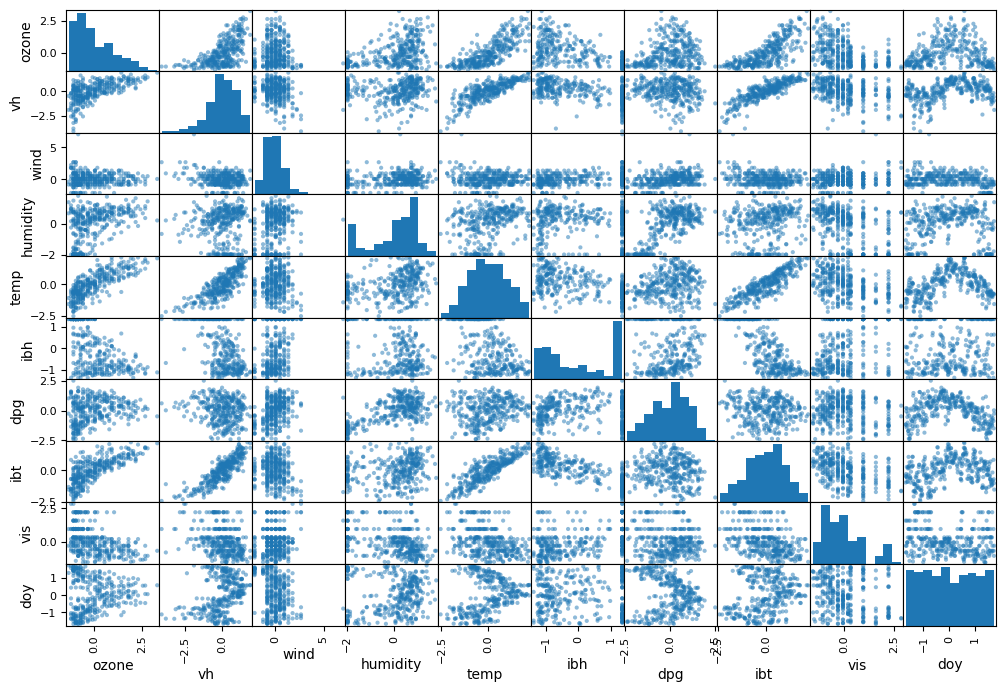

In [21]:
# TODO
from pandas.plotting import scatter_matrix
scatter_matrix(frame=df_base, figsize=(12, 8))
plt.show


In [22]:
from scipy.stats import pearsonr
for itr in pd.Series(df_base.columns).str[:]:
    corrolation, p_value = pearsonr(df_base[itr], df_base['ozone'])
    print(f"{itr}: {corrolation}")


ozone: 0.9999999999999998
vh: 0.607343794244547
wind: -0.013413523796795803
humidity: 0.4492239898883544
temp: 0.7807028346191881
ibh: -0.5895341482476244
dpg: 0.2140463941249155
ibt: 0.7455781689894608
vis: -0.4409894648745818
doy: 0.06619978391445218



<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با توجه به نمودار به سه ویژگی  temp، vh و ibt به نظر با ozone رابطه بیشتری دارد. سپس با بدست اوردن ضریب همبستگی پیرسون متوجه می‌شویم که temp مناسب‌ترین گزینه است.
</div>

In [23]:
lin_reg = LinearRegression()
X_train = train_set.iloc[:, 4].values.reshape(-1, 1)
Y_train = train_set.iloc[:, 0].values
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [24]:
X_test = test_set.iloc[:, 4].values.reshape(-1, 1)
Y_test = test_set.iloc[:, 0].values
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)
train_errors = mean_squared_error(
    Y_train, y_train_predict, multioutput='raw_values')
test_errors = mean_squared_error(
    Y_test, y_test_predict, multioutput='raw_values')
print(train_errors)
print(test_errors)


[0.39003228]
[0.39332237]


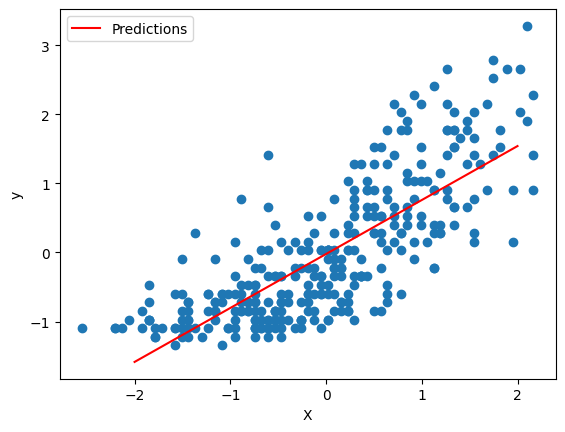

In [31]:

plt.scatter(x=df_base['temp'].values, y=df_base['ozone'].values)
plt.plot([-2, 2], [lin_reg.predict(np.array([[-2]])), lin_reg.predict(
    np.array([[2]]))], color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# C. Linear regression on splitted data by median (50 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با در نظر گرفتن ویژگی انتخاب شده در قسمت (ب)، محدوده ویژگی مورد نظر را به دو قسمت تقسیم کنید طوری که تعداد داده ها در هر دو دسته تقریبا برابر باشد. (برای مثال اگر محدوده داده بدست آمده بین ۰ تا ۱۰۰ بود و داده های بین ۰ تا ۴۰ و داده های بین ۴۰ تا ۱۰۰ تقریبا از نظر تعداد با هم برابر هستند، محدوده این ویژگی را از نقطه ۴۰ به دو قسمت تقسیم کنید). سپس برای هر کدام از قسمتها، رگرسیون خطی را اعمال کرده و خطای میانگین مجموع مربعات را برای داده های آموزش و تست را محاسبه نمایید. داده ها و خطوط برازش شده را در یک نمودار رسم کنید. سپس نتایج بدست آمده را با قسمت (ب) مقایسه نموده و اختلاف یا شباهت را بررسی نمایید.
</div>

In [26]:
# TODO
temp_list = df_base.iloc[:, 4].values
np.median(temp_list)


0.01700198964073493

In [27]:
df_sorted = df_base.sort_values(by=['temp'])
df_sorted.head


<bound method NDFrame.head of         ozone        vh      wind  humidity      temp       ibh       dpg  \
57  -1.097089 -4.078571  2.668096 -0.661981 -2.545891  1.347541  0.606519   
32  -1.097089 -3.794340  0.921128  0.195096 -2.199554 -0.683938  0.017674   
56  -1.097089 -2.657416  0.921128 -0.611564 -2.199554  1.347541  0.746720   
31  -1.097089 -3.225878  0.484386  0.295928 -2.130286  1.347541  0.298076   
99  -0.972075 -2.846904  2.668096 -1.166143 -2.061019  1.347541  0.522398   
..        ...       ...       ...       ...       ...       ...       ...   
218  1.903237  1.700792 -0.825839  0.497593  2.095023 -1.210268 -0.318809   
219  3.278387  1.890280  0.047645  0.195096  2.095023 -1.119216 -0.487051   
220  1.403183  1.890280  1.357870  0.144679  2.164290 -1.084238  0.270036   
167  2.278278  1.132330  0.921128 -0.157818  2.164290 -1.069803  0.213956   
221  0.903129  1.416561  0.047645  0.648842  2.164290 -0.648961  0.438278   

          ibt       vis       doy  
57  -2.43

In [28]:
temp_1 = df_sorted.iloc[:164, :]
temp_2 = df_sorted.iloc[165:, :]
temp_train_1, temp_test_1 = train_test_split(
    temp_1, test_size=0.3, random_state=42)
temp_train_2, temp_test_2 = train_test_split(
    temp_2, test_size=0.3, random_state=42)
lin_reg_1 = LinearRegression()
lin_reg_2 = LinearRegression()
X_train_1 = temp_train_1.iloc[:, 4].values.reshape(-1, 1)
Y_train_1 = temp_train_1.iloc[:, 0].values
lin_reg_1.fit(X_train_1, Y_train_1)
X_test_1 = temp_test_1.iloc[:, 4].values.reshape(-1, 1)
Y_test_1 = temp_test_1.iloc[:, 0].values
y_train_predict_1 = lin_reg.predict(X_train_1)
y_test_predict_1 = lin_reg.predict(X_test_1)
train_errors_1 = mean_squared_error(Y_train_1, y_train_predict_1)
test_errors_1 = mean_squared_error(Y_test_1, y_test_predict_1)
print(train_errors_1)
print(test_errors_1)
X_train_2 = temp_train_2.iloc[:, 4].values.reshape(-1, 1)
Y_train_2 = temp_train_2.iloc[:, 0].values
lin_reg_2.fit(X_train_2, Y_train_2)
X_test_2 = temp_test_2.iloc[:, 4].values.reshape(-1, 1)
Y_test_2 = temp_test_2.iloc[:, 0].values
y_train_predict_2 = lin_reg.predict(X_train_2)
y_test_predict_2 = lin_reg.predict(X_test_2)
train_errors_2 = mean_squared_error(Y_train_2, y_train_predict_2)
test_errors_2 = mean_squared_error(Y_test_2, y_test_predict_2)
print(train_errors_2)
print(test_errors_2)


0.26985147852468605
0.22191430551716668
0.46942398141952363
0.6595969372692535


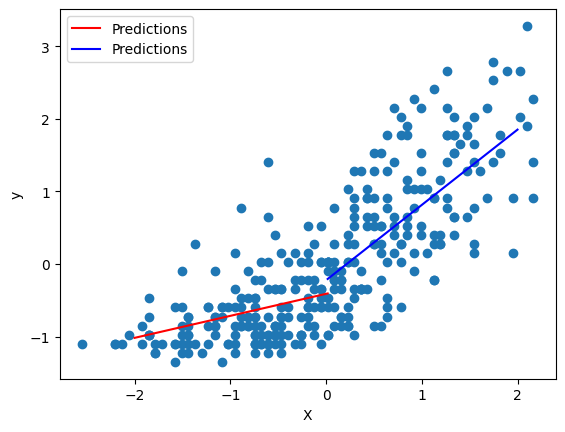

In [32]:
plt.scatter(x=df_sorted['temp'].values, y=df_sorted['ozone'].values)
plt.plot([-2, 0.017], [lin_reg_1.predict(np.array([[-2]])), lin_reg_1.predict(np.array([[0.017]]))], color='red', label='Predictions')
plt.plot([0.017, 2], [lin_reg_2.predict(np.array([[0.017]])), lin_reg_2.predict(np.array([[2]]))], color='blue', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با توجه به نتایج به دست آمده، مدلی که برای خط سمت چپ محاسبه شده از مدل کلی که در قسمت ب بدست آمد، دقت بیشتری دارد اما مدل خط سمت راست با توجه به پراکندگی بیشتر داده ها دقت کمتری دارد.
</div>